In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer
import json
import re


df1 = pd.read_csv('trump-tweets-raw(data-world).csv',encoding='Latin-1')
json_data = open("donald_data.json",'r')
df = pd.read_csv('Donald-Tweets!.csv',encoding='Latin-1')

In [2]:
def get_month(date):
    """
    Extract the month from the Date column and 
    then convert month from letter to digit.
    INPUT: date
    OUTPUT: month 
    """
    
    month = date.split()[1]
    
    for m, m_num in {'Jan': "01",
                     'Feb': "02",
                     'Mar': "03",
                     'Apr': "04",
                     'May': "05",
                     'Jun': "06",
                     'Jul': "07",
                     'Aug': "08",
                     'Sep': "09",
                     'Okt': "10",
                     'Nov': "11",
                     'Dec': "12"}.items():
        if month == m:
            return month.replace(m, m_num)            

def get_day(date):
    
    """
    Extract the day from the Date column 
    INPUT: date
    OUTPUT: day 
    """ 
    return date.split()[2]

def get_year(date):
    """
    Extract the month from the Date column 
    INPUT: date
    OUTPUT: year 
    """ 
    year = re.search("\S*$",date)
    return year.group(0)
    
def get_time(date):
    """
    Extract the time from the Date column 
    INPUT: date
    OUTPUT: time 
    """ 
    time = re.search("[0-9].:[0-9].:[0-9]*",date)
    return time.group(0)


twt_date = []
twt_text = []

for i in json_data:
    twt_date.append(json.loads(i)['created_at'])
    twt_text.append(json.loads(i)['full_text'])

df_json = pd.DataFrame({'Date': twt_date,
                   'Text': twt_text})

df_json['month'] = df_json.apply(lambda x: get_month(str(x['Date'])), axis=1)
df_json['day'] = df_json.apply(lambda x: get_day(str(x['Date'])), axis=1)
df_json['year'] = df_json.apply(lambda x: get_year(str(x['Date'])), axis=1)
df['time'] = df_json.apply(lambda x: get_time(str(x['Date'])), axis=1)
#df.drop(columns='Date')
df_json['Date'] = df_json['year']+'-'+df_json['month']+'-'+df_json['day']

df_update = df_json[['Date','Text']]
df_update.head()

,Date,Text
0,2018-09-11,The safety of American people is my absolute h...
1,2018-09-11,Small Business Optimism Soars to Highest Level...
2,2018-09-11,#NeverForget #September11th \nhttps://t.co/l8W...
3,2018-09-11,17 years since September 11th!
4,2018-09-11,"Departing Washington, D.C. to attend a Flight ..."


In [3]:
df.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11,time
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN,20:16:49
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN,16:48:49
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,NaN,NaN,15:32:28
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,NaN,NaN,12:58:10
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,NaN,NaN,12:24:52


In [4]:
df[df['Date']=='16-08-08']

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,twt_favourites_IS_THIS_LIKE_QUESTION_MARK,Retweets,Unnamed: 10,Unnamed: 11,time
1140,16-08-08,23:18:42,"As Senator Clinton promised 200,000 jobs in Up...",text,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,17785,7962,NaN,NaN,17:13:47
1141,16-08-08,22:45:33,Many people are saying that the Iranians kille...,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,34214,13469,NaN,NaN,14:04:24
1142,16-08-08,22:43:56,Thank you Newt! https://t.co/Acg0hMvrpr,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,25622,9019,NaN,NaN,13:37:34
1143,16-08-08,22:27:02,Thank you Congressman Steven Palazzo! https://...,text,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,16813,6173,NaN,NaN,13:29:32
1144,16-08-08,22:24:09,Thank you Senator David Perdue!\nhttps://t.co/...,link,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,15824,6197,NaN,NaN,13:19:34
1145,16-08-08,22:20:31,Thank you @RepLouBarletta!\nhttps://t.co/bre8u...,text,photo,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,13848,4721,NaN,NaN,13:11:05
1146,16-08-08,22:15:44,Thank you @NFIB- together we will #MakeAmerica...,text,NaN,MakeAmericaGreatAgain,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,13526,4574,NaN,NaN,13:04:21
1147,16-08-08,22:12:21,Thank you! https://t.co/4p0hzpkVWF,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,12272,3654,NaN,NaN,21:27:48
1148,16-08-08,22:06:25,Thank you Alex! https://t.co/c2uIa7mndP,text,NaN,NaN,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,13384,4291,NaN,NaN,18:37:39
1149,16-08-08,20:14:57,RT @NFIB: .@NFIB encouraged by @realDonaldTrum...,link,NaN,taxplan;smallbiz,7.630000e+17,https://twitter.com/realDonaldTrump/status/762...,8115,3356,NaN,NaN,18:00:43


In [5]:
df1.tail()

,id,source,text,created
2337,734938503541325825,Android,Much of the money I have raised for our vetera...,2016-05-24T02:46:08Z
2338,734936659851128832,Android,"While under no obligation to do so, I have rai...",2016-05-24T02:38:48Z
2339,734903156589645824,iPhone,Join me in California or Montana!\n5/25/16: An...,2016-05-24T00:25:41Z
2340,734892328637325312,Android,I will be interviewed on @oreillyfactor at 8:0...,2016-05-23T23:42:39Z
2341,734742416494845952,Android,"In trade, military and EVERYTHING else, it wil...",2016-05-23T13:46:57Z


In [6]:
#Create two new columns for date and time 
import re
df1['Date'] = df1['created'].str.replace(r'T(\d\d):(\d\d):(\d\d)Z','')
df1['Time'] = df1['created'].str.replace(r'(\d\d\d\d)-(\d\d)-(\d\d)T','').str.replace(r'Z','')

In [7]:
#Remove uncessary columns 
columns = ['Type','Media_Type','Hashtags','Tweet_Id','Tweet_Url','twt_favourites_IS_THIS_LIKE_QUESTION_MARK','Retweets','Unnamed: 10','Unnamed: 11']
df = df.drop(columns,axis=1)
df.tail()


,Date,Time,Tweet_Text,time
7370,15-07-16,13:10:00,I loved firing goofball atheist Penn @pennjill...,NaN
7371,15-07-16,10:18:31,I hear @pennjillette show on Broadway is terri...,NaN
7372,15-07-16,10:10:17,Irrelevant clown @KarlRove sweats and shakes n...,NaN
7373,15-07-16,9:44:07,"""@HoustonWelder: Donald Trump is one of the se...",NaN
7374,15-07-16,0:21:25,RT @marklevinshow: Trump: Rove is a clown and ...,NaN


In [8]:
columns = ['id','source','created']
df1 = df1.drop(columns,axis=1)
df1

,text,Date,Time
0,"The #AmazonWashingtonPost, sometimes referred ...",2017-06-28,13:06:14
1,Some of the Fake News Media likes to say that ...,2017-06-28,10:58:59
2,The failing @nytimes writes false story after ...,2017-06-28,10:49:22
3,I just finished a great meeting with the Repub...,2017-06-27,22:27:48
4,"With ZERO Democrats to help, and a failed, exp...",2017-06-27,22:22:55
...,...,...,...
2337,Much of the money I have raised for our vetera...,2016-05-24,02:46:08
2338,"While under no obligation to do so, I have rai...",2016-05-24,02:38:48
2339,Join me in California or Montana!\n5/25/16: An...,2016-05-24,00:25:41
2340,I will be interviewed on @oreillyfactor at 8:0...,2016-05-23,23:42:39


In [9]:
#Update the year with 4-digit
df['Date'] = df['Date'].str.replace(r'^()','20')
df.tail()

,Date,Time,Tweet_Text,time
7370,2015-07-16,13:10:00,I loved firing goofball atheist Penn @pennjill...,NaN
7371,2015-07-16,10:18:31,I hear @pennjillette show on Broadway is terri...,NaN
7372,2015-07-16,10:10:17,Irrelevant clown @KarlRove sweats and shakes n...,NaN
7373,2015-07-16,9:44:07,"""@HoustonWelder: Donald Trump is one of the se...",NaN
7374,2015-07-16,0:21:25,RT @marklevinshow: Trump: Rove is a clown and ...,NaN


In [10]:
#Rename & capatilize first letter of a column
df.rename(columns={'Tweet_Text':'Text'}, inplace=True)
df1.rename(columns={'text':'Text'}, inplace=True)

In [11]:
#Change column order 
#Change the time format from x:xx:xx to xx:xx:xx
#and merge the dataframe together 

df = df[['Text','Date','Time']]
df['Time'] = df['Time'].str.replace(r'^(\d):(\d\d):(\d\d)',r'0\1:\2:\3')


In [12]:
df.tail() #2016-11 2015-07
#df[df['Date'] == '2016-11-11']

,Text,Date,Time
7370,I loved firing goofball atheist Penn @pennjill...,2015-07-16,13:10:00
7371,I hear @pennjillette show on Broadway is terri...,2015-07-16,10:18:31
7372,Irrelevant clown @KarlRove sweats and shakes n...,2015-07-16,10:10:17
7373,"""@HoustonWelder: Donald Trump is one of the se...",2015-07-16,09:44:07
7374,RT @marklevinshow: Trump: Rove is a clown and ...,2015-07-16,00:21:25


In [13]:
df1.tail() #2017-06 2016-05
df1[df1['Date'] == '2016-11-11']

,Text,Date,Time
1791,Today we express our deepest gratitude to all ...,2016-11-11,15:26:37
1792,Busy day planned in New York. Will soon be mak...,2016-11-11,13:33:35
1793,Love the fact that the small groups of protest...,2016-11-11,11:14:20
1794,Just had a very open and successful presidenti...,2016-11-11,02:19:44
1795,A fantastic day in D.C. Met with President Oba...,2016-11-11,02:10:46


In [160]:
df_merged = pd.concat([df,df1, df_update])
#df_merged = merged.copy()#df1[df1['Date']=='2016-08-08'].copy()
df_merged = df_merged.reset_index()


In [161]:
# Plot the first five lines of text
for text in df_merged['Text']:
    print(text)

Today we express our deepest gratitude to all those who have served in our armed forces. #ThankAVet https://t.co/wPk7QWpK8Z
Busy day planned in New York. Will soon be making some very important decisions on the people who will be running our government!
Love the fact that the small groups of protesters last night have passion for our great country. We will all come together and be proud!
Just had a very open and successful presidential election. Now professional protesters, incited by the media, are protesting. Very unfair!
A fantastic day in D.C. Met with President Obama for first time. Really good meeting, great chemistry. Melania liked Mrs. O a lot!
Happy 241st birthday to the U.S. Marine Corps! Thank you for your service!! https://t.co/Lz2dhrXzo4
Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before
Watching the returns at 9:45pm.
#ElectionNight #MAGA__ https://t.co/HfuJeRZbod
RT @IvankaTrump: Su

Thank you to everyone who came out &amp; joined us @TrumpTurnberry yesterday! @EricTrump @IvankaTrump @DonaldJTrumpJr https://t.co/hQ1JTMrUtG
On the 13th tee box @TrumpScotland with my grand daughter, Kai! @DonaldJTrumpJr https://t.co/7ii4KUfsab
Arriving @TrumpScotland with @DonaldJTrumpJr &amp; @EricTrump. Back to New York tonight.
Video: https://t.co/2GUKqOTHS5
So funny, Crooked Hillary called BREXIT so incorrectly, and now she says that she is the one to deal with the U.K. All talk, no action!
Thoughts and prayers are with everyone in West Virginia- dealing with the devastating floods. #ImWithYou
"@Jolena3: @realDonaldTrump And we will get it back once we have President Trump! Cant wait!"
"@DarrenWaggener: @realDonaldTrump What has happened in the UK in the last 12 hours is exactly what will happen in November..vote TRUMP 2016
Many people are equating BREXIT, and what is going on in Great Britain, with what is happening in the U.S. People want their country back!
The opening of Trum

Reading @nytdavidbrooks of the NY Times is a total waste of time, he is a clown with no awareness of the world around him- dummy!
While I have never met @nytdavidbrooks of the NY Times, I consider him one of the dumbest of all pundits- he has no sense of the real world!
Heading to Phoneix. Will be arriving soon. Tomorrow a big day. Tremendous crowds expected! #Trump2016 #MakeAmericaGreatAgain
Watching @loudobbsnews- fantastic show! Has very interesting take on Paul Ryan.
Just leaving Salt Lake City, Utah- fantastic crowd with no interruptions.
Love Utah- will be back!
RT @MarkHalperin: Utah Speaker of the House announces endorsement of @realDonaldTrump. Says @DonaldJTrumpJr played a big role
Why havent they released the final Missouri victory for us yet? Could it be because Cruzs guy runs Missouri?
I guess I have reached yet another "ceiling"  - 49.7%, with four people. My highest Reuters poll yet! Thank you! https://t.co/k5Ft585Arp
Do you believe that Hillary Clinton now wants Obamaca

"@icareeguns: This #Iowan is voting for @RealDonaldTrump #IACaucus. Thank you for supporting IOWA! https://t.co/w0zb668avg"  My great honor
By the way, Hillary &amp; the MSM forgot to mention that Hillary is in the
Al-Shabaab terror video. https://t.co/gRannsRXJr
The worst thing Hillary could do is have her husband campaign for her. Just watch.
Iran, with all of the money and all else given to them by Obama, has wanted a way to take over Saudi Arabia &amp; their oil. THEY JUST FOUND IT!
"@barbaraslavin1: @RuthMarcus @washingtonpost bashing distinguished women journalists wont win you votes"  She is 3rd rate, a total dummy!
"@TINAHILLSTROM1: @FoxNews @KatrinaPierson I love @piersmorgan &amp; @realDonaldTrump REAL MEN w/ an opinion Exciting interesting controversial
#VoteTrump2016 https://t.co/INFulzILxV
RT @CLewandowski_: Its official -- everybody wants Donald Trump to be the President. #Trump2016 https://t.co/MOFpwefEZ2
.@RuthMarcus of the @washingtonpost was terrible today on Face The

"@bob_forbes2: DonaldTrump has built a lifetime reputation of doing what he says he will do. He keeps his promises. https://t.co/VBFuJOWIMa
"@pjs307: @WalshFreedom Will be highest rated show ever, @realDonaldTrump is a marketing genius #SNL" Hope it does well!
"@DefendingtheUSA: GREAT Video. Which of these 4 Polls is Suspect? Kudos to @OANN  https://t.co/kKlRLIDrLC #Trump https://t.co/BiEUTt2k6Z"
"@eric_wagaman94: Super excited to watch @realDonaldTrump tomorrow night on @nbcsnl #MakeAmericaGreatAgain"
"@bigsampolkcoga:  @GovChristie @MikeHuckabeeGOP @FoxBusiness and they kept Rand Paul on the main stage. Lets get Huck and Christie back."
"@TrumpsMyHomeboy: @realDonaldTrump @Robostop10 @politico The #MSM straw man candidate is falling apart!___Ù_"
"@BornToBeGOP: @realDonaldTrump @Robostop10 @politico How anyone could see him as president baffles me. Lies and insane theories.
"@CaptainMark_:  @Robostop10 KEEP IT COMMING TRUMP!!!! People need to be warned about that Carson figure who is

"@TheBrodyFile: On the Muslim issue: It might help @BarackObama if he actually didnt come across as hostile to evangelicals in this country
"@PaulkDebra: @TODAYshow @realDonaldTrump I totally support you! You have this Ga. Girls vote!!!"
"@MNTwisterChaser: Thanks @SavannahGuthrie and @NBCNews for showing us how lopsided you are! Use your own poll! #trainwreck #Trump2016
The @TODAYshow refused to use their just in poll numbers where I have a massive lead but instead used @CNN numbers where my lead is smaller.
Will be on @foxandfriends  now. Enjoy!
"@SaijoSaijo75: @realDonaldTrump thank you for your personal and financial sacrifices to make america great again!"
Carly Fiorina did such a horrible job at Lucent and HP, virtually destroying both companies, that she never got another CEO job offer! Pres.
We are going to WIN and MAKE AMERICA GREAT AGAIN, maybe better than ever before!
I am attracting the biggest crowds, by far, and the best poll numbers, also by far.   Much of the media is to

We need leaders who can negotiate great deals for Americans. It is common sense. LetÛªs Make America Great Again! https://t.co/u25yI5T7E8
Leaving for New Hampshire now. Making a speechpacked house.  Love it!
The Iran deal poses a direct national security threat. It must be stopped in Congress. Stand up Republicans!
The worst show in Las Vegas, in my opinion, is @pennjillette. Hokey garbage. New York show even worse!
Dopey @Lawrence OÛªDonnell, whose unwatchable show is dying in the ratings, said that my Apprentice $ numbers were wrong. He is a fool!
No deal is better than a bad deal. America out negotiated again.  #Iran
FLASHBACK  Donald Trump Blasts Obama for Failing to Secure Christian PastorÛªs Freedom in Iran"  http://t.co/AwCVNdzyry via @theblazeÛª
Via @TIME by @ZekeJMiller: Trump Talks Politics at His Virginia WineryÛ http://t.co/h3eIc4mgu3
Via @FSMtweet: Trump is Right: Illegal Alien Crime is Staggering in Scope and SavageryÛ http://t.co/najLkku1zE
30,000 MACYÛªS CUSTOMERS RET

Cruz said Kasich should leave because he couldn't get to 1237. Now he can't get to 1237. Drop out LYIN' Ted.
Both Ted Cruz and John Kasich have no path to victory. They should both drop out of the race so that the Republican Party can unify!
Senator Ted Cruz has been MATHEMATICALLY ELIMINATED from race. He said Kasich should get out for same reason. I think both should get out!
I will be doing the @TODAYshow with my wife, Melania, and the rest of my family in a major Town Hall. Hopefully, it will be fun! Enjoy.7A.M.
Thank you Maryland- what a great way to conclude the day! Will be back soon. #Trump2016 https://t.co/dNeTdMENdV https://t.co/JbJYYpEsmo
We are going to bring steel and manufacturing back to Indiana!
Had a meeting with the terrific @GovPenceIN of Indiana. So excited to campaign in his wonderful state! https://t.co/73uCyV6ql4
Thank you Indiana! Will be back soon!
#Trump2016 #MakeAmericaGreatAgain https://t.co/pxvSL8cs3B
Off to Indiana! #Trump2016 https://t.co/zqUdaaSaXD
Ted C

The U.S. is respected again! https://t.co/NtQ4vsoqnk
Richard Trumka, the head of the AFL-CIO, represented his union poorly on television this weekend. Some of the things he said were so against the working men and women of our country, and the success of the U.S. itself, that it is easy to see why unions are doing so poorly. A Dem!
The Worker in America is doing better than ever before. Celebrate Labor Day!
Happy Labor Day! Our country is doing better than ever before with unemployment setting record lows. The U.S. has tremendous upside potential as we go about fixing some of the worst Trade Deals ever made by any country in the world. Big progress being made!
....The fact is that African/American unemployment is now the lowest in the history of our country. Same with Asian, Hispanic and almost every other group. The Democrats have been all talk and no action. My Administration has already produced like no other, and everyone sees it!
Tiger Woods showed great class in the way he answer

Our relationship with Russia is worse now than it has ever been, and that includes the Cold War. There is no reason for this. Russia needs us to help with their economy, something that would be very easy to do, and we need all nations to work together. Stop the arms race?
Russia vows to shoot down any and all missiles fired at Syria. Get ready Russia,  because they will be coming, nice and new and “smart!” You shouldn’t be partners with a Gas Killing Animal who kills his people and enjoys it!
....doing things that nobody thought possible, despite the never ending and corrupt Russia Investigation, which takes tremendous time and focus. No Collusion or Obstruction (other than I fight back), so now they do the Unthinkable, and RAID a lawyers office for information! BAD!
So much Fake News about what is going on in the White House. Very calm and calculated with a big focus on open and fair trade with China, the coming North Korea meeting and, of course, the vicious gas attack in Syria. Feel

JFK Files are released, long ahead of schedule!
While not at all presidential I must point out that the Sloppy Michael Moore Show on Broadway was a TOTAL BOMB and was forced to close. Sad!
Happy #FirstRespondersDay to all of our HEROES out there. We are forever grateful to you for your service, sacrifice and courage 24/7/365! https://t.co/vOcTlyOeyw
...in order to put any and all conspiracy theories to rest.
...addresses of any mentioned person who is still living. I am doing this for reasons of full disclosure, transparency and...
After strict consultation with General Kelly, the CIA and other Agencies, I will be releasing ALL #JFKFiles other than the names and...
Today is National Prescription Drug Take Back Day. Everyone can help fight the #OpioidEpidemic by participating! https://t.co/ONObTWOaOn https://t.co/CYG11DnxH7
Just read the nice remarks by President Jimmy Carter about me and how badly I am treated by the press (Fake News). Thank you Mr. President!
Very little reporting abo

In [166]:
def cleaning_round1(x):
    
    
    x = re.sub(r"http.+",'', x) #remove URL
    x = re.sub(r"^RT.*$",'',x) # remove all retweets
    x = re.sub(r"\".*","",x) # remove all qoutes
    x.replace('Ûªs',"")
    x.replace('ÛªS',"")
    x = re.sub(r"[a-zA-Z]\/","",x)
    x = re.sub(r"[&]\S*\s",'',x) # remove words starting with & like &amp
    x = re.sub(r"\s+",' ', x) # replace several spaces with one space
  
    return x

df_merged['Text'] = df_merged.apply(lambda x: cleaning_round1(str(x['Text'])),axis=1)
for text in df_merged['Text'][-10:-1]:
    print(text)

If we want to renew our PROSPERITY, restore OPPORTUNITY, re-establish our economic DOMINANCE, then we need tax reform that is pro-growth.. 
Thank you for joining me in Mandan, ND Gov. @DougBurgum, Lt. Gov. @BrentSanfordND, @SenJohnHoeven, @RepKevinCramer @SenatorHeitkamp. 
Wonderful to be in North Dakota with the incredible hardworking men women @ the Andeavor Refinery. Full remarks: 🎥
Just spoke Governors Rick Scott of Florida, Kenneth Mapp of the U.S. Virgin Islands Ricardo Rosselló of Puerto Rico. WE ARE YOU ALL! 
'President Donald J. Trump Approves Emergency Declarations' ➡️ ➡️ ➡️
Hurricane looks like largest ever recorded in the Atlantic!
Watching Hurricane closely. My team, which has done, and is doing, such a good job in Texas, is already in Florida. No rest for the weary!
Will be going to North Dakota today to discuss tax reform and tax cuts. We are the highest taxed nation in the world - that will change.
Congress now has 6 months to legalize DACA (something the Obama Administ

In [171]:
def cleaning_round2(x):
    
    

    x = re.sub(r"[.]","" ,x) #replace words like U.S. with US
    x = re.sub(r"\!","" ,x)
 
    #x = re.sub(r"[^a-zA-Z@´]",' ', x) # Remove non-letters except @'´
    #x = x.replace("'s",'')
    #x = x.replace("'S",'')
    #x = x.replace("U S",'US')
    
    return x

df_merged['Text'] = df_merged.apply(lambda x: cleaning_round2(str(x['Text'])),axis=1)
for text in df_merged['Text'][-10:-1]:
    print(text)

If we want to renew our PROSPERITY, restore OPPORTUNITY, re-establish our economic DOMINANCE, then we need tax reform that is pro-growth 
Thank you for joining me in Mandan, ND Gov @DougBurgum, Lt Gov @BrentSanfordND, @SenJohnHoeven, @RepKevinCramer @SenatorHeitkamp 
Wonderful to be in North Dakota with the incredible hardworking men women @ the Andeavor Refinery Full remarks: 🎥
Just spoke Governors Rick Scott of Florida, Kenneth Mapp of the US Virgin Islands Ricardo Rosselló of Puerto Rico WE ARE YOU ALL 
'President Donald J Trump Approves Emergency Declarations' ➡️ ➡️ ➡️
Hurricane looks like largest ever recorded in the Atlantic
Watching Hurricane closely My team, which has done, and is doing, such a good job in Texas, is already in Florida No rest for the weary
Will be going to North Dakota today to discuss tax reform and tax cuts We are the highest taxed nation in the world - that will change
Congress now has 6 months to legalize DACA (something the Obama Administration was unable 

In [172]:
text2016 = ''.join(df_merged[(df_merged['Date'] >='2016-01-01') & (df_merged['Date'] <='2016-12-31')]['Text'])
text2017 = ''.join(df_merged[(df_merged['Date'] >='2017-01-01') & (df_merged['Date'] <='2018-12-31')]['Text'])
text2017 = text2017.replace("\t",'')
text2017

"The #AmazonWashingtonPost, sometimes referred to as the guardian of Amazon not paying internet taxes (which they should) is FAKE NEWSSome of the Fake News Media likes to say that I am not totally engaged in healthcare Wrong, I know the subject well want victory for USThe failing @nytimes writes false story after false story about me They don't even call to verify the facts of a story A Fake News JokeI just finished a great meeting with the Republican Senators concerning HealthCare They really want to get it right, unlike OCareWith ZERO Democrats to help, and a failed, expensive and dangerous ObamaCare as the Dems legacy, the Republican Senators are working hardSo they caught Fake News CNN cold, but what about NBC, CBS ABC? What about the failing @nytimes @washingtonpost? They are all Fake NewsFake News CNN is looking at big management changes now that they got caught falsely pushing their phony Russian stories Ratings way downWow, CNN had to retract big story on Great day for America'

In [193]:
new_words = ['much','will','aren','couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']
update_stop_words = STOPWORDS.union(new_words)
cv = CountVectorizer(stop_words='english')

text_cv = cv.fit_transform([text2016])

text_cv.toarray()
#for i in cv.vocabulary_:
#    print(i)
dff=pd.DataFrame(text_cv.toarray(), columns=cv.get_feature_names()).transpose().sort_values(by=0,ascending=False)#.filter(like='make',axis=0)
dff.head(10)



,0
great,647
thank,619
hillary,578
trump2016,446
clinton,392
makeamericagreatagain,321
people,309
america,296
crooked,289
just,287


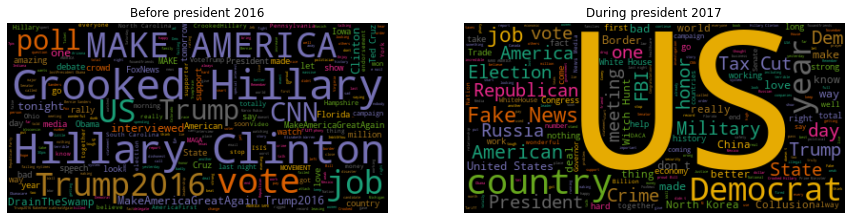

In [221]:
update_stop_words = STOPWORDS.union(['S','U','big','much','time','want','many','done',
                                     'back','said','see','need','great','people','thank',
                                    'must','don t', 'good', 'going','win','even','now',
                                     'today','join','new','will','never'])

text2016 = text2016.replace('will','')
text2017 = text2017.replace('will','')
fig, axes = plt.subplots(1,2,squeeze=False,figsize=(15,15))

wordcloud2016 = WordCloud(max_words=300, background_color="black",
                          colormap='Dark2',random_state=72,
                          stopwords=update_stop_words,
                          max_font_size=200).generate(text2016)

wordcloud2017 = WordCloud(max_words=300, background_color="black",
                          colormap='Dark2',random_state=72,
                          stopwords=update_stop_words,
                          max_font_size=200).generate(text2017)

axes[0][0].imshow(wordcloud2016, interpolation='bilinear')
axes[0][1].imshow(wordcloud2017, interpolation='bilinear')
axes[0][0].title.set_text('Before president 2016')
axes[0][1].title.set_text('During president 2017')
#axes[0][0].axis("off")
#axes[0][0].title('2016 before president')
axes[0][0].axis('off')
axes[0][1].axis('off')
plt.show()

In [222]:
pol = []
sub = []
for i, text in enumerate(test['Text']):
    pol.append(TextBlob(text).sentiment[0])
    sub.append(TextBlob(text).sentiment[1])


NameError: name 'test' is not defined

In [ ]:
df_sentiment = pd.DataFrame({'polarity':pol,
                         'subjectivity':sub})

# Concatenate the two dataframes into one
df = pd.concat([test,df_sentiment], axis=1)
df.sort_values(by='Date',inplace=True)
df.head()

In [ ]:
text2017 = df[(df['Date'] >='2017-01-01') & (df['Date'] >='2017-06-15')]['Text']
lst_text = []
lst_text.append(' '.join(text for text in text2017))

wordcloud = WordCloud(max_words=100, background_color="black",colormap='BuPu').generate(lst_text[0])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('2017 during president')
plt.show()


In [ ]:
df['date'] = df['Date']+' '+df['Time']
df['date'] = pd.to_datetime(df['date'])
df.info()

In [ ]:
df.drop(columns=['index'],inplace=True)

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
sentiment_week = df.groupby(pd.Grouper(key='date',freq='w')).mean()
sentiment_day = df.groupby(pd.Grouper(key='date',freq='d')).mean()

sentiment_day.plot(alpha=0.7, ax=ax1,figsize=(12,4))
sentiment_week.plot(alpha=0.7, ax=ax2)

In [ ]:
test = df1[df1['Date']=='2016-08-08'].copy()
for i in test['Text']:
    print(i)

#re.sub(r"(?<=\s(http.)).*?(?=\s)",'',test['Text'])
#test['Text'].replace("http.+",'',regex=True,inplace=True)
#test['Text'].replace("@\S*",'',regex=True,inplace=True)
#test['Text'].replace("[\n]",'',regex=True,inplace=True)
#test['Text']

In [ ]:
test['Text'][2235]

In [ ]:
df[df['Date']=='16-08-08']

In [ ]:
df1s = df1.sort_values(by=['Date','Time'])

In [ ]:
df1s[df1s['Date']=='2016-08-08']

In [ ]:
df[df['Date']<='16-05-22'] #2016-11 2015-07